##1. (3 points) Logistic Regression

##Use Banknote Authentication Dataset for this question. Perform a train:val:test split in the ratio 7:1:2 and implement Logistic Regression.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [4]:
#importing libraries/packages

import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from pandas import DataFrame

import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("BankNote_Authentication.csv")
df #overview of raw data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
#shows missing values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.shape

(1372, 5)

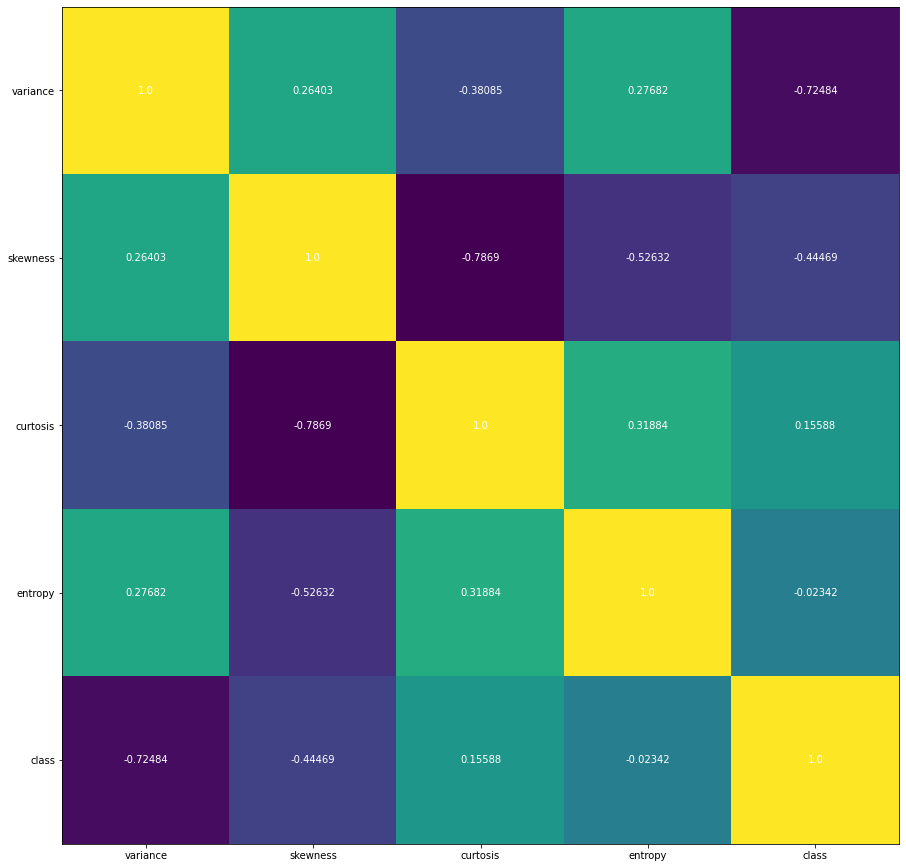

In [11]:
#understanding correlation between features

#find the correlation matrix
corMatrix = pd.DataFrame(df.iloc[:,:5].corr()).values
corMatrix = np.around(corMatrix, decimals = 5)

#visualize the correlation matrix of bank dataset
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
fig, ax = plot.subplots(figsize = (15,40))
im = ax.imshow(corMatrix)

ax.set_xticks(range(len(corMatrix)))
ax.set_yticks(range(len(corMatrix)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

for i in range(5):
    for j in range(5):
        text = ax.text(j, i, corMatrix[i, j],ha="center", va="center", color="w")

In [12]:
#print correlation with target variable ie. "class"
feature_importance = pd.DataFrame(df.iloc[:,:5].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of their Importance are as follows-', list(feature_importance.index))

Features in Descending Order of their Importance are as follows- ['curtosis', 'entropy', 'skewness', 'variance']


In [13]:
#the target feature is discrete
set(df['class'])

{0, 1}

In [14]:
print("Number of Fake notes = " + str(len(df[df['class'] == 0])))

Number of Fake notes = 762


In [15]:
print("Number of Authentic notes = " + str(len(df[df['class'] == 1])))

Number of Authentic notes = 610


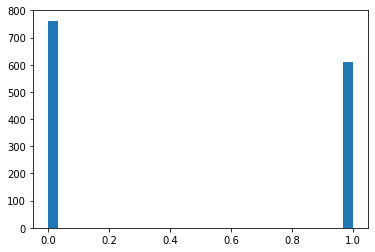

In [16]:
# plotting the distribution of target ('class')
n, bins, patches = plot.hist(df['class'], bins = 30)

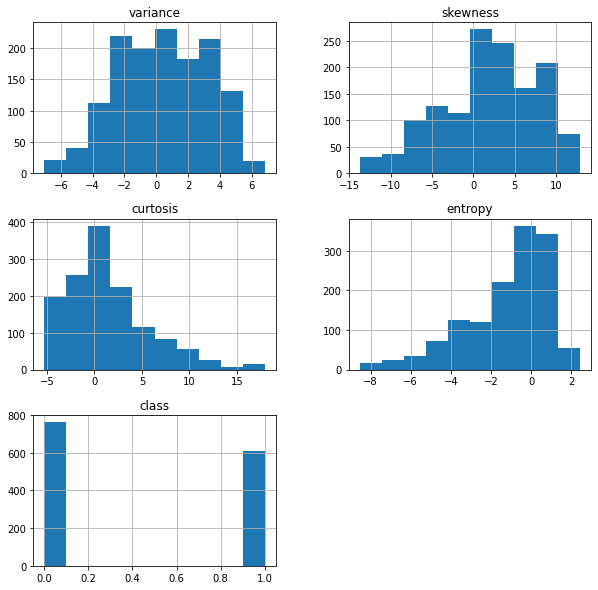

In [18]:
# plotting the distribution 
df.hist(figsize = (10,10))
plt.show()

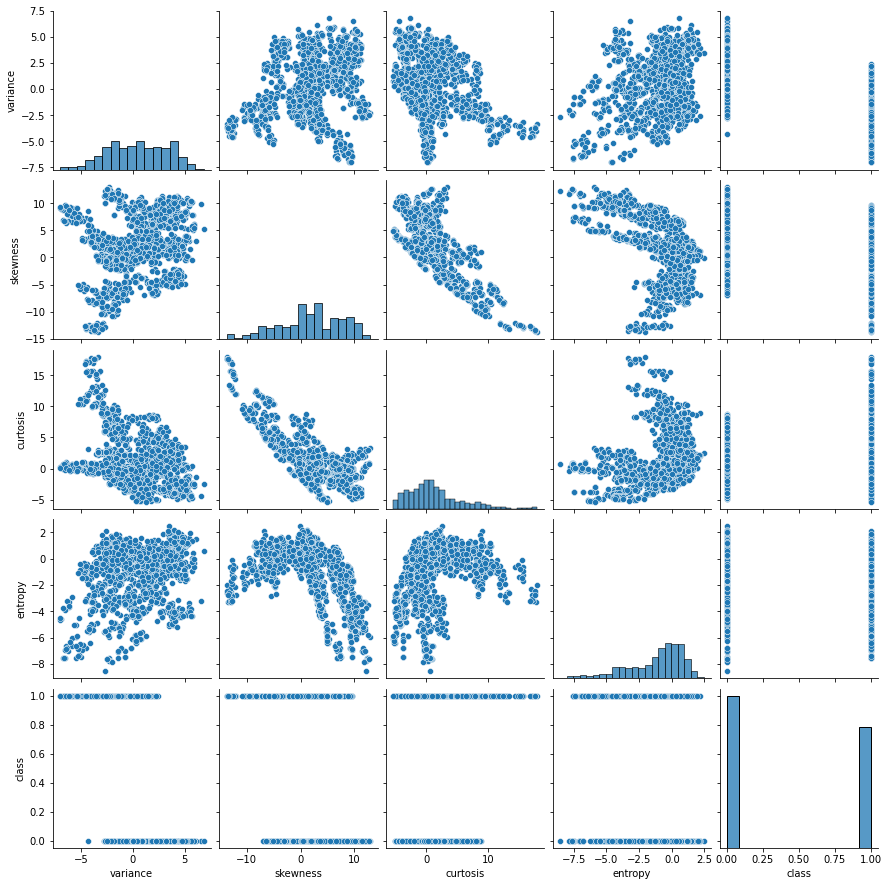

In [20]:
# show pairplot
sns.pairplot(df)

In [21]:
# Separate the target/label(y) value from features(x)
y = df["class"]
x = df.drop(columns = "class")

print(x.shape)
print(y.shape)

(1372, 4)
(1372,)


In [22]:
#Split the data into 70-10-20 train-val-test splits.

seed = 1000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.3, random_state=seed)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.667, random_state=seed)

print(df.shape)

print("\nTrain dataset")
print(x_train.shape)
print(y_train.shape)

print("\nValidation dataset")
print(x_validation.shape)
print(y_validation.shape)

print("\nTest dataset")
print(x_test.shape)
print(y_test.shape)

(1372, 5)

Train dataset
(960, 4)
(960,)

Validation dataset
(137, 4)
(137,)

Test dataset
(275, 4)
(275,)


In [23]:
#scaling the input features 

sc = StandardScaler()

sc.fit(x_train)
sc.fit(x_validation)
sc.fit(x_test)

x_train_std = sc.transform(x_train)
x_validation_std = sc.transform(x_validation)
x_test_std = sc.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_object = LogisticRegression() 

lr_object.fit(x_train_std, y_train)

y_pred = lr_object.predict(x_test_std)  

In [26]:
# evaluate the linear regression model:

print(classification_report(y_test, y_pred)) 

print(confusion_matrix(y_test, y_pred)) 

print(accuracy_score(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       145
           1       0.98      0.99      0.98       130

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[142   3]
 [  1 129]]
0.9854545454545455


The output shows the Logistic Regression model to have an accuracy of 98.54% with 3 misclassifications.

In [27]:
#to check class distribution in the test dataset
y_test.value_counts()

0    145
1    130
Name: class, dtype: int64

In [28]:
##Evaluating the Logistic Regressor

#Checking the accuracy score of Logistic Regressor using train, test and val dataset
print('Logistic-Regression Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Compare the validation-set and test-set accuracy
y_pred_val = lr_object.predict(x_validation_std)
print('\nValidation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_validation, y_pred_val)))

# print the scores on train, validation and test set
print('\nTraining set score: {:.4f}'.format(lr_object.score(x_train_std, y_train)))
print('Validation set score: {:.4f}'.format(lr_object.score(x_validation_std, y_validation)))
print('Test set score: {:.4f}'.format(lr_object.score(x_test_std, y_test)))

Logistic-Regression Model accuracy score: 0.9855

Validation-set accuracy score: 0.9708

Training set score: 0.9812
Validation set score: 0.9708
Test set score: 0.9855


##(a) Using Gradient Descent (GD), choose an appropriate learning rate and the number of epochs (iterations). Report the accuracy obtained on both the training and test set (2 points).


In [53]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [55]:
df.shape

(1372, 5)

In [63]:
X = df.drop(labels=['class'], axis=1).values
y = df['class'].values
print("Features = ", X)
print("\nLabels = ", y)

Features =  [[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]

Labels =  [0 0 0 ... 1 1 1]


In [64]:
import tensorflow as tf 

#set seed values for numpy and tensorflow for reproducible results
seed = 23
np.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
# initialize train index to avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [66]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [83]:
#data normalisation

# Define the normalized function
def min_max_normalized(data_input):
    col_max = np.max(data_input, axis=0)
    col_min = np.min(data_input, axis=0)
    return np.divide(data_input - col_min, col_max - col_min)

train_X_norm = min_max_normalized(train_X)
test_X_norm = min_max_normalized(test_X)

In [71]:
#LOGISTIC REGRESSION MODEL FRAMEWORK

#declare the tensor variables which need to be initialized and learned

#tensor variables to be learned
A = tf.Variable(tf.random.normal(shape=[4, 1]))   #no. of features = 4
b = tf.Variable(tf.random.normal(shape=[1, 1]))

#tensor variables initialized
initializer = tf.compat.v1.global_variables_initializer()

#set the tensor session 
session = tf.compat.v1.Session()
session.run(initializer)

In [72]:
#put placeholder variables
data_input = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])
target_output = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])

In [73]:
#model learning #LOGISTIC REGRESSION
log_model = tf.matmul(data_input, A) + b

In [74]:
#the loss function 
#'sigmoid cross-entropy' loss function
loss_funct = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=log_model, labels=target_output))

In [103]:
#intialize parameters
learn_rate = 0.003
batch = 30
epoch = 100000

In [104]:
#optimizer
opt = tf.compat.v1.train.GradientDescentOptimizer(learn_rate)

In [105]:
#goal
goal = opt.minimize(loss_funct)

In [106]:
#accuracy of the model
pred = tf.round(tf.sigmoid(log_model))
correct_pred = tf.cast(tf.equal(pred, target_output), dtype=tf.float32)
accuracy = tf.reduce_mean(correct_pred)

In [107]:
#Creating list variables to store the results
loss_trace = []
train_accuracy = []
test_accuracy = []

In [108]:
# training model
for i in range(epoch):

    #random batch index
    batch_index = np.random.choice(len(train_X_norm), size=batch)
    batch_x_train = train_X_norm[batch_index]
    batch_y_train = np.matrix(train_y[batch_index]).T

    session.run(goal, feed_dict={data_input: batch_x_train, target_output: batch_y_train})
    temp_loss = session.run(loss_funct, feed_dict={data_input: batch_x_train, target_output: batch_y_train})

    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_accuracy = session.run(accuracy, feed_dict={data_input: train_X_norm, target_output: np.matrix(train_y).T})
    temp_test_accuracy = session.run(accuracy, feed_dict={data_input: test_X_norm, target_output: np.matrix(test_y).T})
    
    # store the result in the list
    loss_trace.append(temp_loss)
    train_accuracy.append(temp_train_accuracy)
    test_accuracy.append(temp_test_accuracy)

    # output
    if (i + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(i + 1, temp_loss, temp_train_accuracy, temp_test_accuracy))

epoch:  300 loss: 0.438047 train_acc: 0.874317 test_acc: 0.875912
epoch:  600 loss: 0.473152 train_acc: 0.874317 test_acc: 0.875912
epoch:  900 loss: 0.388771 train_acc: 0.874317 test_acc: 0.879562
epoch: 1200 loss: 0.452621 train_acc: 0.874317 test_acc: 0.879562
epoch: 1500 loss: 0.506660 train_acc: 0.874317 test_acc: 0.879562
epoch: 1800 loss: 0.438234 train_acc: 0.874317 test_acc: 0.879562
epoch: 2100 loss: 0.406881 train_acc: 0.875228 test_acc: 0.879562
epoch: 2400 loss: 0.420862 train_acc: 0.874317 test_acc: 0.879562
epoch: 2700 loss: 0.377841 train_acc: 0.874317 test_acc: 0.879562
epoch: 3000 loss: 0.441209 train_acc: 0.877049 test_acc: 0.879562
epoch: 3300 loss: 0.451786 train_acc: 0.877049 test_acc: 0.879562
epoch: 3600 loss: 0.355497 train_acc: 0.877049 test_acc: 0.879562
epoch: 3900 loss: 0.411953 train_acc: 0.879781 test_acc: 0.879562
epoch: 4200 loss: 0.391774 train_acc: 0.879781 test_acc: 0.879562
epoch: 4500 loss: 0.439034 train_acc: 0.879781 test_acc: 0.879562
epoch: 480

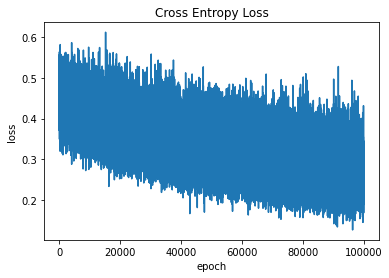

In [109]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Mean Training-set Accuracy=  0.9104506
Mean Test-set Accuracy=  0.8999807




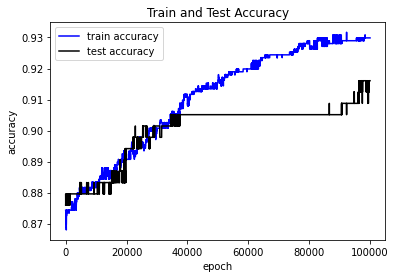

In [113]:
# accuracy
import statistics
print("Mean Training-set Accuracy= ", statistics.mean(train_accuracy))
print("Mean Test-set Accuracy= ", statistics.mean(test_accuracy))
print("\n")

#plot
plt.plot(train_accuracy, 'b-', label='train accuracy')
plt.plot(test_accuracy, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

#(b) Include plots between training loss v/s iterations and validation loss v/s iterations. 

In [115]:
#built the neural network architecture
model = Sequential()
model.add(Dense(3, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(train_X_norm, train_y, epochs=500, validation_split=0.2)

Train on 878 samples, validate on 220 samples
Epoch 1/500
878/878 [==============================] - 0s 202us/sample - loss: 0.2547 - mean_squared_error: 0.2547 - mean_absolute_error: 0.5039 - val_loss: 0.2507 - val_mean_squared_error: 0.2507 - val_mean_absolute_error: 0.5002
Epoch 2/500
878/878 [==============================] - 0s 38us/sample - loss: 0.2516 - mean_squared_error: 0.2516 - mean_absolute_error: 0.5014 - val_loss: 0.2491 - val_mean_squared_error: 0.2491 - val_mean_absolute_error: 0.4990
Epoch 3/500
878/878 [==============================] - 0s 41us/sample - loss: 0.2495 - mean_squared_error: 0.2495 - mean_absolute_error: 0.4994 - val_loss: 0.2484 - val_mean_squared_error: 0.2484 - val_mean_absolute_error: 0.4983
Epoch 4/500
878/878 [==============================] - 0s 41us/sample - loss: 0.2484 - mean_squared_error: 0.2484 - mean_absolute_error: 0.4983 - val_loss: 0.2481 - val_mean_squared_error: 0.2481 - val_mean_absolute_error: 0.4979
Epoch 5/500
878/878 [============

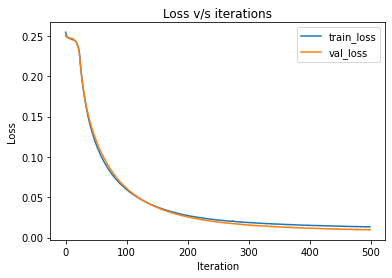

In [119]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='train_loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss v/s iterations")
plt.legend()